In [4]:
# Podatkovno rudarjenje ocena vrednosti hiš

# Priprava podatkov

In [35]:
import numpy as np
import operator
import matplotlib.pyplot as plt



vsi_podatki = np.loadtxt('train.csv', delimiter=",", skiprows=1,dtype=np.str,encoding="UTF8")

stevilo_soseske = dict()
cene_prodaj = dict()
povprecne_cene = dict()

In [42]:
# 12 soseska 
# 80 cene

for i in vsi_podatki:
    if i[12] in stevilo_soseske:
        stevilo_soseske[i[12]] += 1
    else:
        stevilo_soseske[i[12]] = 1
        
    if i[12] in cene_prodaj:
        cene_prodaj[i[12]] += int(i[80])
    else:
        cene_prodaj[i[12]] = int(i[80])

for i in cene_prodaj:
    povprecne_cene[i] = cene_prodaj[i]/stevilo_soseske[i]   
    
cene_sort = sorted(povprecne_cene.items())
sortirano = sorted(((c, povp) for povp, c in cene_sort))

print("Povprecna vrednost prodanih hiš glede na sosesko:")

sortirano

Povprecna vrednost prodanih hiš glede na sosesko:


[(98576.4705882353, 'MeadowV'),
 (100123.78378378379, 'IDOTRR'),
 (104493.75, 'BrDale'),
 (124834.05172413793, 'BrkSide'),
 (128219.7, 'Edwards'),
 (128225.30088495575, 'OldTown'),
 (136793.13513513515, 'Sawyer'),
 (137500.0, 'Blueste'),
 (142591.36, 'SWISU'),
 (142694.44444444444, 'NPkVill'),
 (145847.08, 'NAmes'),
 (156270.1224489796, 'Mitchel'),
 (186555.7966101695, 'SawyerW'),
 (189050.0684931507, 'NWAmes'),
 (192854.50632911394, 'Gilbert'),
 (194870.88235294117, 'Blmngtn'),
 (197965.77333333335, 'CollgCr'),
 (210624.72549019608, 'Crawfor'),
 (212565.42857142858, 'ClearCr'),
 (225379.83720930232, 'Somerst'),
 (238772.72727272726, 'Veenker'),
 (242247.44736842104, 'Timber'),
 (310499.0, 'StoneBr'),
 (316270.6233766234, 'NridgHt'),
 (335295.31707317074, 'NoRidge')]

([<matplotlib.axis.XTick at 0xe305d90>,
 <a list of 25 Text xticklabel objects>)

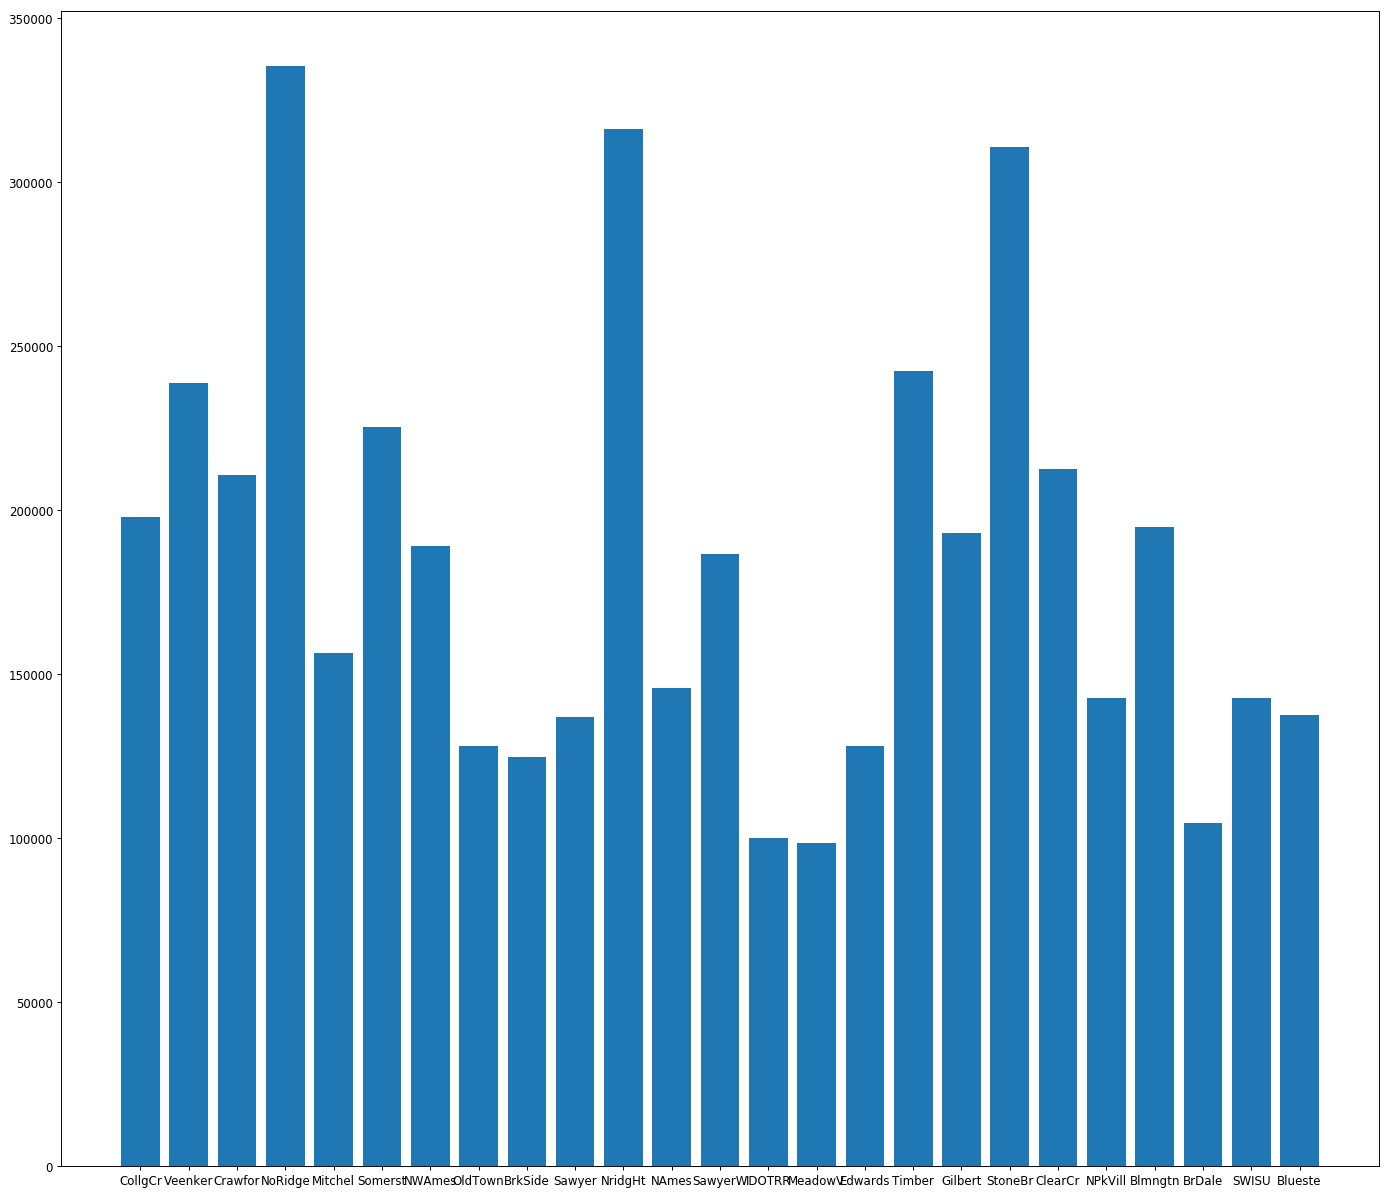

In [43]:
fig=plt.figure(figsize=(20, 18), dpi= 85, facecolor='w', edgecolor='k')
plt.bar(range(len(povprecne_cene)), list(povprecne_cene.values()), align='center')
plt.xticks(range(len(povprecne_cene)), list(povprecne_cene.keys()))